In [3]:
import rnn, vae, config
import torch
import numpy as np
import matplotlib.pyplot as plt
import train_rnn
import train_vae
import json
import scipy.linalg as linalg
import os

dim_latent_z = 8

In [13]:
random_index = 21#22
lambda_sv = 0.0
state_vars_to_predict = [9, 10, 11]
detach_gradients = False
use_layernorm = False
truncate_at_batch = 40
n_hidden = 128
train_epochs = 250
save_every_epochs = 50
max_gradient_norm = 100.0
lr = 0.001
random_index = random_index
lambda_sv = lambda_sv
#epoch = 500

sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict) > 0 else 'X'
rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
         f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

#rnn_model = rnn.MDNRNN(dim_latent_z, state_vars_to_predict=state_vars_to_predict, use_layernorm=use_layernorm).to(config.device)
#rnn_model.load_state_dict(torch.load(f'data/rnn{rnn_id}/rnn_model_epoch{epoch}.pt', map_location=config.device))
#n_gaussians = rnn_model.n_gaussians

324.3
226.5


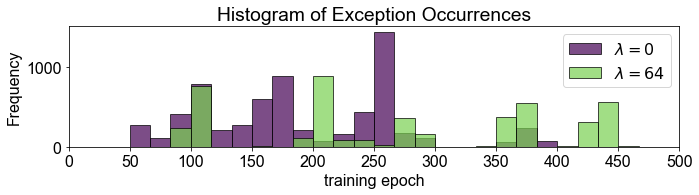

In [47]:

plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(10, 3))

lambda_svs = [0.0, 64.0]
losses = [[] for lambda_sv in lambda_svs]
for lambda_sv_i, lambda_sv in enumerate(lambda_svs):
    exception_epochs = []
    for random_index in (range(20, 40)):
        color = plt.cm.get_cmap('viridis')(np.linspace(0, .8, len(lambda_svs)))[lambda_sv_i]
        state_vars_to_predict = [9, 10, 11]
        detach_gradients = False
        use_layernorm = False
        truncate_at_batch = 40
        n_hidden = 128
        train_epochs = 250
        save_every_epochs = 50
        max_gradient_norm = 100.0
        lr = 0.001
        random_index = random_index
        lambda_sv = lambda_sv
        dim_latent_z = 8
        #if lambda_sv == 0: state_vars_to_predict = []
        
        sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
        rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                 f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

        last_epoch = 0
        for file in os.listdir(f"data/rnn{rnn_id}/"):
            if file.startswith("rnn_model_epoch") and file.endswith(".pt"):
                epoch_num = int(file.split("epoch")[1].split(".")[0])
                if epoch_num > last_epoch:
                    last_epoch = epoch_num
        
        with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
            rnn_meta = json.loads(in_file.read())
        exception_epochs.extend(rnn_meta['exceptions_log'])
    # Create the histogram
    print(len(exception_epochs)/20)
    plt.hist(exception_epochs, bins=30, range=(0, 500), alpha=.7, color=color, edgecolor='black', label = f"$\\lambda = {int(lambda_sv)}$")


plt.xlabel('training epoch')
plt.ylabel('Frequency')
plt.title('Histogram of Exception Occurrences')
plt.xlim(0, 500)
plt.xticks(range(0, 501, 50))
#plt.grid(True)

plt.legend()
# Display the histogram
plt.tight_layout()
plt.show()

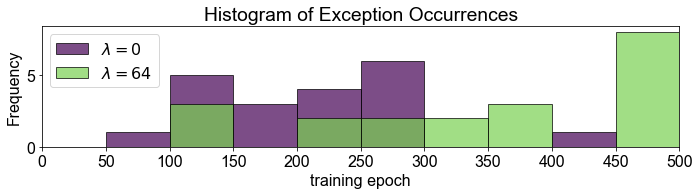

In [45]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(10, 3))

lambda_svs = [0.0, 64.0]
losses = [[] for lambda_sv in lambda_svs]
for lambda_sv_i, lambda_sv in enumerate(lambda_svs):
    exception_epochs = []
    for random_index in (range(20, 40)):
        color = plt.cm.get_cmap('viridis')(np.linspace(0, .8, len(lambda_svs)))[lambda_sv_i]
        state_vars_to_predict = [9, 10, 11]
        detach_gradients = False
        use_layernorm = False
        truncate_at_batch = 40
        n_hidden = 128
        train_epochs = 250
        save_every_epochs = 50
        max_gradient_norm = 100.0
        lr = 0.001
        random_index = random_index
        lambda_sv = lambda_sv
        dim_latent_z = 8
        #if lambda_sv == 0: state_vars_to_predict = []
        
        sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
        rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                 f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

        last_epoch = 0
        for file in os.listdir(f"data/rnn{rnn_id}/"):
            if file.startswith("rnn_model_epoch") and file.endswith(".pt"):
                epoch_num = int(file.split("epoch")[1].split(".")[0])
                if epoch_num > last_epoch:
                    last_epoch = epoch_num
        
        with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
            rnn_meta = json.loads(in_file.read())
        exception_epochs.append(last_epoch)
    # Create the histogram
    plt.hist(exception_epochs, bins=10, range=(0, 500), alpha=.7, color=color, edgecolor='black', label = f"$\\lambda = {int(lambda_sv)}$")


plt.xlabel('training epoch')
plt.ylabel('Frequency')
plt.title('Histogram of Exception Occurrences')
plt.xlim(0, 500)
plt.xticks(range(0, 501, 50))
#plt.grid(True)
plt.legend()
# Display the histogram
plt.tight_layout()
plt.show()

In [31]:
exception_epochs

[350,
 200,
 200,
 100,
 150,
 150,
 50,
 500,
 100,
 150,
 50,
 500,
 50,
 100,
 50,
 150,
 250,
 500,
 150,
 100]

In [32]:
lambda_svs = [0.0, 64.0]
losses = [[] for lambda_sv in lambda_svs]
for lambda_sv_i, lambda_sv in enumerate(lambda_svs):
    for random_index in (range(20, 40) if lambda_sv_i>0 else range(40)):
        color = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(lambda_svs)))[lambda_sv_i]
        state_vars_to_predict = [9, 10, 11]
        detach_gradients = False
        use_layernorm = False
        truncate_at_batch = 40
        n_hidden = 128
        train_epochs = 250
        save_every_epochs = 50
        max_gradient_norm = 100.0
        lr = 0.001
        random_index = random_index
        lambda_sv = lambda_sv
        dim_latent_z = 8
        #if lambda_sv == 0: state_vars_to_predict = []
        
        sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
        rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                 f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

        last_epoch = 0
        for file in os.listdir(f"data/rnn{rnn_id}/"):
            if file.startswith("rnn_model_epoch") and file.endswith(".pt"):
                epoch_num = int(file.split("epoch")[1].split(".")[0])
                if epoch_num > last_epoch:
                    last_epoch = epoch_num
        if last_epoch < 500: continue

        print(f"'{rnn_id}',")

'_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv0.0_r7',
'_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv0.0_r11',
'_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv0.0_r17',
'_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv64.0_r22',
'_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv64.0_r23',
'_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv64.0_r24',
'_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv64.0_r27',
'_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv64.0_r28',
'_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv64.0_r31',
